## getting each model's predictions

In [1]:
#get predictions from all models
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt

DanQ_test = np.load('../train_val_test/final_features/evolANDepi_DanQval_redo.npy')

In [3]:
#using xgboost conda env
xg = joblib.load('../final_models/final_xgboost.pkl')
rf = joblib.load('../final_models/final_randomforest.pkl')
en = joblib.load('../final_models/final_elasticnet.pkl')
lin = joblib.load('../final_models/final_linear.pkl')

total_array = lin.predict(DanQ_test)
for i in [en, rf, xg]:
    predicted = i.predict(DanQ_test)
    total_array = np.dstack((total_array, predicted))

#np.save('../final_models/predicted_scores.npy', total_array)

[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 500 out of 500 | elapsed:    0.8s finished


In [4]:
#using keras conda env
from keras.models import load_model
nn = load_model('../final_models/final_neuralnetwork.h5')
total_array = np.load('../final_models/predicted_scores.npy')

predicted = nn.predict(DanQ_test)
total_array = np.dstack((total_array, predicted))

#np.save('../final_models/predicted_scores.npy', total_array)

Using TensorFlow backend.


In [13]:
#total_array[x, y, z]
#x is sequence
#y is cell-promoter
#z is model

## getting correlations between models' predictions
### use as intermodel correlations 

In [2]:
total_array = np.load('../final_models/predicted_scores.npy')

In [3]:
from scipy.stats import stats
import pandas as pd

task = ['HepG2_SV40P', 'HepG2_minP', 'K562_SV40P', 'K562_minP']
model = ['linear', 'elastic', 'random_forest', 'xgboost', 'neural_network']
model_corrs = [[0.2275507563, 0.1930167958, 0.1349729858, 0.2441494625], 
              [0.226689031, 0.1970044401, 0.1316597023, 0.2374657353], 
              [0.2327779059, 0.2096258442, 0.136606506, 0.2413685871],
              [0.2398387153, 0.2119732059, 0.1364683003, 0.2503863104],
              [0.2336789399, 0.2080673393, 0.1429365185, 0.2441566831]]

corrs = pd.DataFrame(columns = ['task', 'model1', 'corr1', 'model2', 'corr2', 'correlation'])
i = 0
for y in range(4):
    for z1 in range(5):
        for z2 in range(z1 + 1, 5):
            corrs.loc[i] = [task[y], model[z1], model_corrs[z1][y], model[z2], model_corrs[z2][y], 
                            stats.spearmanr(total_array[:, y, z1], total_array[:, y, z2])[0]]
            i += 1

corrs

,task,model1,corr1,model2,corr2,correlation
0,HepG2_SV40P,linear,0.227551,elastic,0.226689,0.880673
1,HepG2_SV40P,linear,0.227551,random_forest,0.232778,0.821532
2,HepG2_SV40P,linear,0.227551,xgboost,0.239839,0.846237
3,HepG2_SV40P,linear,0.227551,neural_network,0.233679,0.857671
4,HepG2_SV40P,elastic,0.226689,random_forest,0.232778,0.856192
5,HepG2_SV40P,elastic,0.226689,xgboost,0.239839,0.876183
6,HepG2_SV40P,elastic,0.226689,neural_network,0.233679,0.890865
7,HepG2_SV40P,random_forest,0.232778,xgboost,0.239839,0.928166
8,HepG2_SV40P,random_forest,0.232778,neural_network,0.233679,0.900313
9,HepG2_SV40P,xgboost,0.239839,neural_network,0.233679,0.901775


## finding significance

In [7]:
#adapted from https://github.com/psinger/CorrelationStats/blob/master/corrstats.py
"""
Functions for calculating the statistical significant differences between two dependent or independent correlation
coefficients.
The Fisher and Steiger method is adopted from the R package http://personality-project.org/r/html/paired.r.html
and is described in detail in the book 'Statistical Methods for Psychology'
The Zou method is adopted from http://seriousstats.wordpress.com/2012/02/05/comparing-correlations/
Credit goes to the authors of above mentioned packages!
Author: Philipp Singer (www.philippsinger.info)
"""

from __future__ import division

__author__ = 'psinger'

import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95, method='steiger'):
    """
    Calculates the statistic significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    if method == 'steiger':
        d = xy - xz
        determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
        av = (xy + xz)/2
        cube = (1 - yz) * (1 - yz) * (1 - yz)

        t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
        p = 1 - t.cdf(abs(t2), n - 3)

        if twotailed:
            p *= 2

        return t2, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(xz, n, conf_level=conf_level)[0]
        U2 = rz_ci(xz, n, conf_level=conf_level)[1]
        rho_r12_r13 = rho_rxy_rxz(xy, xz, yz)
        lower = xy - xz - pow((pow((xy - L1), 2) + pow((U2 - xz), 2) - 2 * rho_r12_r13 * (xy - L1) * (U2 - xz)), 0.5)
        upper = xy - xz + pow((pow((U1 - xy), 2) + pow((xz - L2), 2) - 2 * rho_r12_r13 * (U1 - xy) * (xz - L2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

In [8]:
numsamples = 19833
corrs['tval'] = ''
corrs['pval'] = ''

for row in range(corrs.shape[0]):
    corrs.iloc[row, 6] = dependent_corr(corrs.iloc[row, 2], corrs.iloc[row, 4], corrs.iloc[row, 5], numsamples, method = 'steiger')[0]
    corrs.iloc[row, 7] = dependent_corr(corrs.iloc[row, 2], corrs.iloc[row, 4], corrs.iloc[row, 5], numsamples, method = 'steiger')[1]

In [1]:
#sort by p val
corrs.sort_values(by=['pval'], inplace = True)
corrs.reset_index(drop=True, inplace = True)

NameError: name 'corrs' is not defined

In [10]:
#method from https://www.gs.washington.edu/academics/courses/akey/56008/lecture/lecture10.pdf
threshold = 0.05
m = float(corrs.shape[0])
corrs['BH_FDR'] = np.arange(1, m + 1, 1) * threshold / m 

In [11]:
corrs
#top 12 are sig, and XGBoost appears 7/12 times

,task,model1,corr1,model2,corr2,correlation,tval,pval,BH_FDR
0,HepG2_minP,linear,0.193017,xgboost,0.211973,0.785232,-4.17061,3.05077e-05,0.00125
1,K562_minP,elastic,0.237466,xgboost,0.250386,0.885989,-3.93757,8.25906e-05,0.00250
2,K562_minP,random_forest,0.241369,xgboost,0.250386,0.941883,-3.8477,0.000119607,0.00375
3,HepG2_SV40P,elastic,0.226689,xgboost,0.239839,0.876183,-3.83492,0.000125996,0.00500
4,HepG2_minP,linear,0.193017,random_forest,0.209626,0.757728,-3.44007,0.000582754,0.00625
5,HepG2_minP,elastic,0.197004,xgboost,0.211973,0.788101,-3.31643,0.000913397,0.00750
6,HepG2_minP,linear,0.193017,neural_network,0.208067,0.783022,-3.2924,0.000995114,0.00875
7,HepG2_SV40P,linear,0.227551,xgboost,0.239839,0.846237,-3.21718,0.00129664,0.01000
8,HepG2_SV40P,random_forest,0.232778,xgboost,0.239839,0.928166,-2.70306,0.00687619,0.01125
9,HepG2_minP,elastic,0.197004,random_forest,0.209626,0.765306,-2.65674,0.00789636,0.01250


## graphs for comparison

In [3]:
model_corrs = [[0.2275507563, 0.1930167958, 0.1349729858, 0.2441494625, 0.1999225001], 
              [0.226689031, 0.1970044401, 0.1316597023, 0.2374657353, 0.1982047272], 
              [0.2327779059, 0.2096258442, 0.136606506, 0.2413685871, 0.2050947108],
              [0.2398387153, 0.2119732059, 0.1364683003, 0.2503863104, 0.209666633],
              [0.2336789399, 0.2080673393, 0.1429365185, 0.2441566831, 0.2072098702]]

task = ['HepG2_SV40P', 'HepG2_minP', 'K562_SV40P', 'K562_minP', 'avg']
model = ['linear', 'elastic', 'random_forest', 'xgboost', 'neural_network']

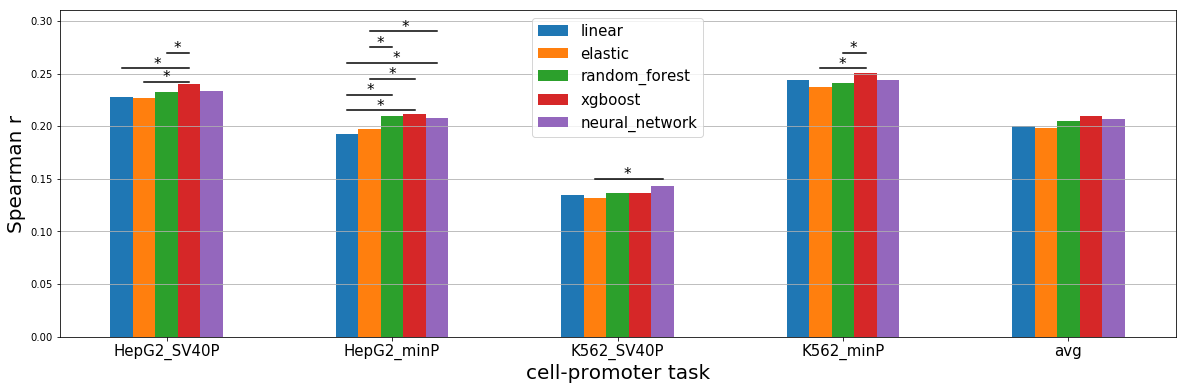

In [14]:
fig = plt.figure(figsize=(20, 6), facecolor='white')

# set width of bar
barWidth = 0.1

# set height of bar
bar0 = model_corrs[0]
bar1 = model_corrs[1]
bar2 = model_corrs[2]
bar3 = model_corrs[3]
bar4 = model_corrs[4]
 
# Set position of bar on X axis
r0 = np.arange(len(bar0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
for x, y, z in zip([r0, r1, r2, r3, r4], [bar0, bar1, bar2, bar3, bar4], model):
    plt.bar(x, y, width = barWidth, label = z)
 
# Add xticks on the middle of the group bars
plt.xlabel('cell-promoter task', size = 20)
plt.xticks([r + 0.2 for r in range(len(bar0))], task, size = 15)
plt.ylabel('Spearman r', size = 20)
plt.ylim([0, 0.31])

#sig stars   WORK ON THIS
sigstars = True
if sigstars == True:
    plt.plot([1, 1.3], [0.215] * 2, 'k')
    plt.text(1.13, 0.215, '*', size = 15)

    plt.plot([3.1, 3.3], [0.255] * 2, 'k')
    plt.text(3.18, 0.255, '*', size = 15)

    plt.plot([3.2, 3.3], [0.27] * 2, 'k')
    plt.text(3.23, 0.27, '*', size = 15)

    plt.plot([0.1, 0.3], [0.242] * 2, 'k')
    plt.text(0.18, 0.242, '*', size = 15)

    plt.plot([1, 1.2], [0.23] * 2, 'k')
    plt.text(1.085, 0.23, '*', size = 15)

    plt.plot([1.1, 1.3], [0.245] * 2, 'k')
    plt.text(1.185, 0.245, '*', size = 15)

    plt.plot([1.0, 1.4], [0.26] * 2, 'k')
    plt.text(1.2, 0.26, '*', size = 15)

    plt.plot([0, 0.3], [0.255] * 2, 'k')
    plt.text(0.14, 0.255, '*', size = 15)

    plt.plot([0.2, 0.3], [0.27] * 2, 'k')
    plt.text(0.23, 0.27, '*', size = 15)

    plt.plot([1.1, 1.2], [0.275] * 2, 'k')
    plt.text(1.13, 0.275, '*', size = 15)

    plt.plot([1.1, 1.4], [0.29] * 2, 'k')
    plt.text(1.24, 0.29, '*', size = 15)

    plt.plot([2.1, 2.4], [0.15] * 2, 'k')
    plt.text(2.225, 0.15, '*', size = 15)

# Create legend & Show graphic
plt.legend(loc = 'upper center', prop={'size': 15})
plt.gca().yaxis.grid(True)
plt.show()
fig.savefig('../figures/fig1a.pdf')

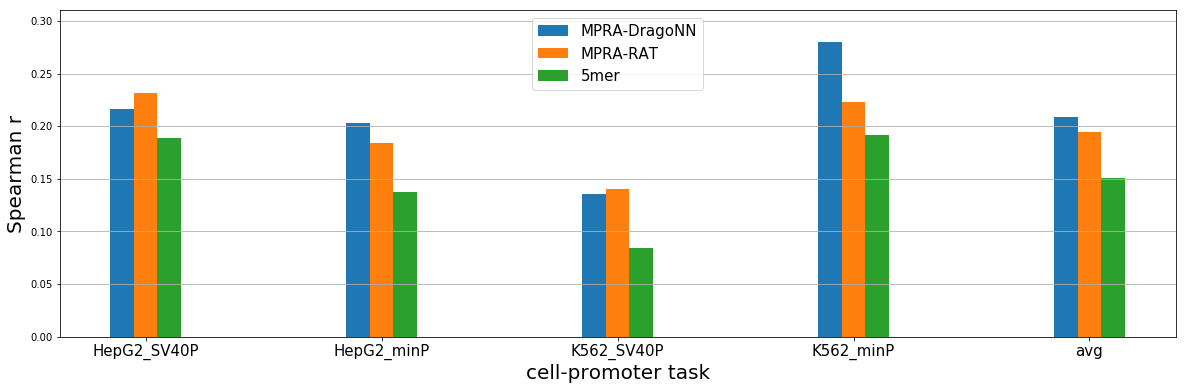

In [11]:
model_corrs = [[0.216, 0.203, 0.136, 0.28, 0.209], 
              [0.232, 0.184, 0.140, 0.223, 0.194], 
              [0.204, 0.169, 0.109, 0.179, 0.165]]
model = ['MPRA-DragoNN', 'MPRA-RAT', '5mer']

fig = plt.figure(figsize=(20, 6), facecolor='white')

# set width of bar
barWidth = 0.1

# set height of bar
bar0 = model_corrs[0]
bar1 = model_corrs[1]
bar2 = model_corrs[2]

# Set position of bar on X axis
r0 = np.arange(len(bar0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]

# Make the plot
for x, y, z in zip([r0, r1, r2], [bar0, bar1, bar2], model):
    plt.bar(x, y, width = barWidth, label = z)
 
# Add xticks on the middle of the group bars
plt.xlabel('cell-promoter task', size = 20)
plt.xticks([r + 0.1 for r in range(len(bar0))], task, size = 15)
plt.ylabel('Spearman r', size = 20)
plt.ylim([0, 0.31])

plt.legend(loc = 'upper center', prop={'size': 15})
plt.gca().yaxis.grid(True)
plt.show()
fig.savefig('../figures/fig1b.pdf', bbox_inches = 'tight')